In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('ipl.csv')

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df =df.drop(['batsman','bowler','mid','striker', 'non-striker'], axis=1)

In [6]:
df.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,74.889349,2.415844,9.783068,33.216434,1.120307,160.901452
std,48.823327,2.015207,5.772587,14.914174,1.053343,29.246231
min,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,34.000000,1.000000,4.600000,24.000000,0.000000,142.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,162.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,181.000000
max,263.000000,10.000000,19.600000,113.000000,7.000000,263.000000


In [7]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [8]:
df.corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.591007,0.938154,0.750565,0.297768,0.254498
wickets,0.591007,1.000000,0.755240,0.242942,0.693740,-0.337343
overs,0.938154,0.755240,1.000000,0.629374,0.382850,0.022282
runs_last_5,0.750565,0.242942,0.629374,1.000000,0.058672,0.368253
wickets_last_5,0.297768,0.693740,0.382850,0.058672,1.000000,-0.273475
total,0.254498,-0.337343,0.022282,0.368253,-0.273475,1.000000


In [9]:
df.isnull().sum()

date              0
venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [10]:
df['date'].max()

'2017-05-21'

In [11]:
df['date'].min()

'2008-04-18'

In [12]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [13]:
df = df.drop(['venue'],axis=1)

In [14]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [15]:
df.shape

(76014, 9)

In [16]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [17]:
consist_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Pune Warriors', 'Sunrisers Hyderabad']

In [18]:
df = df[df['bat_team'].isin(consist_team) & df['bowl_team'].isin(consist_team)]

In [19]:
df.shape

(58733, 9)

In [20]:
df = df[df['overs']>=5]

In [21]:
df.shape

(43792, 9)

In [22]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [23]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [24]:
m_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [25]:
m_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
m_df.corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
runs,1.000000,0.352649,0.876526,0.581245,0.114917,0.397089,0.030284,-0.025697,0.014937,-0.012721,...,0.005708,-0.000966,-0.005012,0.026713,-0.013369,0.001126,-0.016450,-0.027298,0.030854,-0.003662
wickets,0.352649,1.000000,0.634451,-0.207000,0.630902,-0.456956,-0.069724,0.082784,0.054519,0.000979,...,-0.016703,0.013321,0.013757,-0.021760,0.017310,-0.006091,-0.048590,0.039640,-0.017134,-0.012359
overs,0.876526,0.634451,1.000000,0.277907,0.225107,0.026556,0.001611,-0.004760,0.000820,-0.006173,...,0.004209,0.001436,0.001033,-0.000650,0.000146,-0.003204,0.001964,0.001313,-0.003509,0.003829
runs_last_5,0.581245,-0.207000,0.277907,1.000000,-0.280946,0.591251,0.054176,-0.070857,0.011673,-0.034134,...,-0.001071,-0.001145,-0.001921,0.045983,-0.043934,0.008245,-0.024589,-0.040067,0.044527,0.005466
wickets_last_5,0.114917,0.630902,0.225107,-0.280946,1.000000,-0.296398,-0.061158,0.033397,0.054080,0.017092,...,-0.018503,0.007543,0.007913,-0.012658,0.014857,-0.007861,-0.013654,-0.009144,0.006318,0.000472
total,0.397089,-0.456956,0.026556,0.591251,-0.296398,1.000000,0.073850,-0.082467,0.004955,-0.047883,...,0.020277,-0.000772,0.017527,0.064002,-0.067078,-0.000672,-0.032759,-0.039906,0.050411,-0.004678
bat_team_Chennai Super Kings,0.030284,-0.069724,0.001611,0.054176,-0.061158,0.073850,1.000000,-0.136254,-0.159867,-0.142065,...,-0.121455,-0.137530,0.022199,0.001688,0.009743,0.022418,0.032675,0.028476,0.022671,-0.003433
bat_team_Delhi Daredevils,-0.025697,0.082784,-0.004760,-0.070857,0.033397,-0.082467,-0.136254,1.000000,-0.137042,-0.121782,...,-0.104114,-0.005096,-0.143185,0.057130,0.034822,-0.037513,-0.038880,0.070030,0.047879,0.018119
bat_team_Kings XI Punjab,0.014937,0.054519,0.000820,0.011673,0.054080,0.004955,-0.159867,-0.137042,1.000000,-0.142886,...,-0.122157,0.020139,-0.012941,-0.149814,0.098573,0.075753,-0.027371,0.007289,-0.042219,0.022112
bat_team_Kolkata Knight Riders,-0.012721,0.000979,-0.006173,-0.034134,0.017092,-0.047883,-0.142065,-0.121782,-0.142886,1.000000,...,-0.108554,-0.036007,0.029232,-0.030258,-0.145053,0.084846,0.021029,-0.108560,0.135877,0.075209


In [27]:
print(m_df.columns)

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Pune Warriors',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Pune Warriors', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')


In [28]:
m_df = m_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [29]:
ch = m_df.drop(["date"], axis=1)

In [30]:
X_train = m_df.drop(labels='total', axis =1)[m_df['date'].dt.year <= 2016 ]

In [31]:
X_train.tail()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68857,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.2,194,7,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.3,200,7,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.4,201,7,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.5,202,7,57,4
68861,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.6,208,7,62,4


In [32]:
X_test = m_df.drop(labels='total', axis =1)[m_df['date'].dt.year > 2016 ]

In [33]:
X_test.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.5,58,1,51,1


In [34]:
y_train = m_df[m_df['date'].dt.year <= 2016]['total'].values
y_test = m_df[m_df['date'].dt.year >= 2017]['total'].values

In [35]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
regressor.score(X_test,y_test)

0.7497028221757234

In [38]:
pre = regressor.predict(X_test)

/home/koushik/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

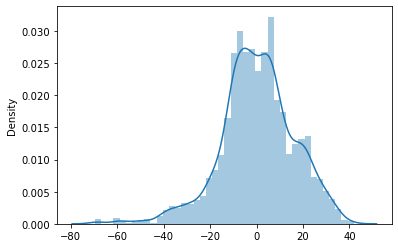

In [39]:
import seaborn as sns
sns.distplot(y_test-pre)

In [52]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))